In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def collect_user_info():
    user_info = {}
    user_info['name'] = input("Enter your name: ")
    user_info['occupation'] = input("Enter your occupation: ")
    user_info['income'] = float(input("Enter your total income for the month: "))
    
    expenses = {}
    total_expenses = 0
    while True:
        category = input("Enter expense category (or 'done' to finish): ")
        if category.lower() == 'done':
            break
        amount = float(input(f"Enter amount for {category}: "))
        if category in expenses:
            expenses[category] += amount
        else:
            expenses[category] = amount
        total_expenses += amount
    
    user_info['expenses'] = expenses
    user_info['total_expenses'] = total_expenses
    if total_expenses <= user_info['income']:
        user_info['savings'] = user_info['income'] - total_expenses
        user_info['loan'] = 0
    else:
        user_info['savings'] = 0
        user_info['loan'] = total_expenses - user_info['income']
    
    return user_info





In [2]:
def process_data(user_info):
    expenses = user_info['expenses']
    expenses['Savings'] = user_info['savings']
    if user_info['loan'] > 0:
        expenses['Loan'] = user_info['loan']
    expenses['Income'] = user_info['income']
    data = {'Category': list(expenses.keys()), 
            'Amount': list(expenses.values())}
    df = pd.DataFrame(data)
    return df

Enter your name: talha
Enter your occupation: softwareengineer
Enter your total income for the month: 125000
Enter expense category (or 'done' to finish): rent
Enter amount for rent: 50000
Enter expense category (or 'done' to finish): bills
Enter amount for bills: 25000
Enter expense category (or 'done' to finish): utility
Enter amount for utility: 15000
Enter expense category (or 'done' to finish): shopping
Enter amount for shopping: 23000
Enter expense category (or 'done' to finish): fees
Enter amount for fees: 36000
Enter expense category (or 'done' to finish): done


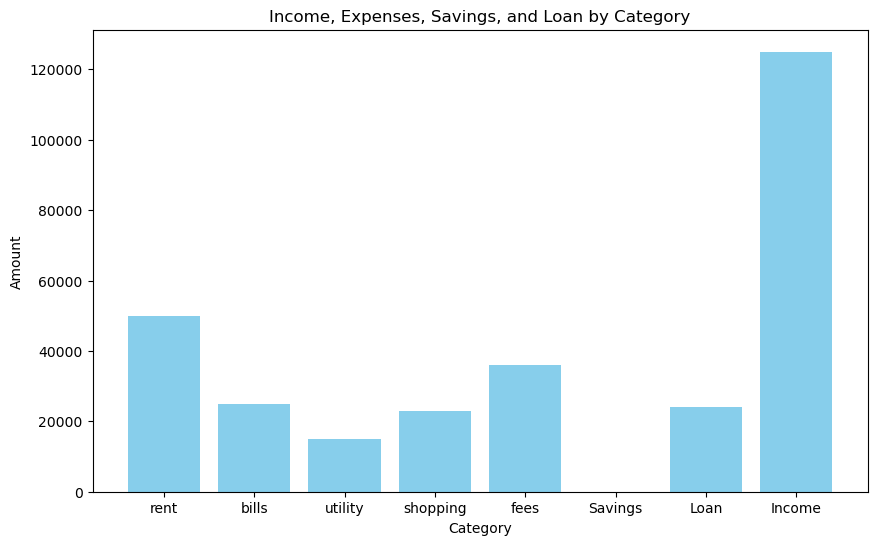

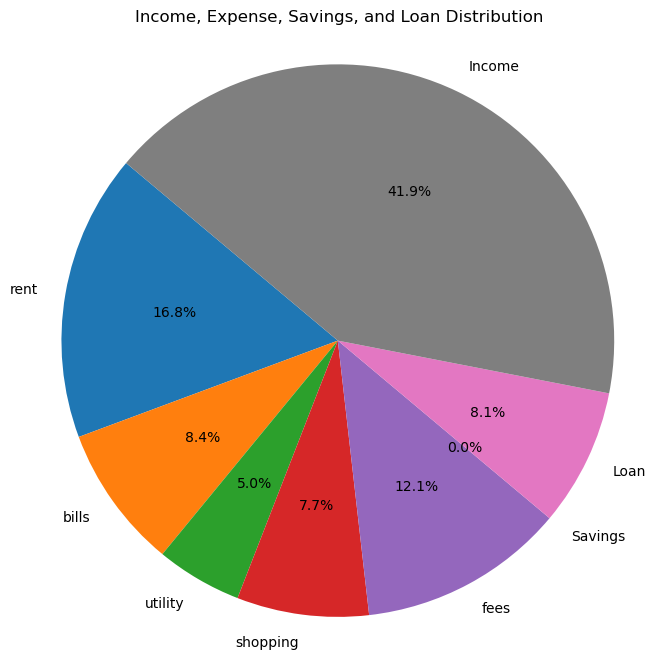

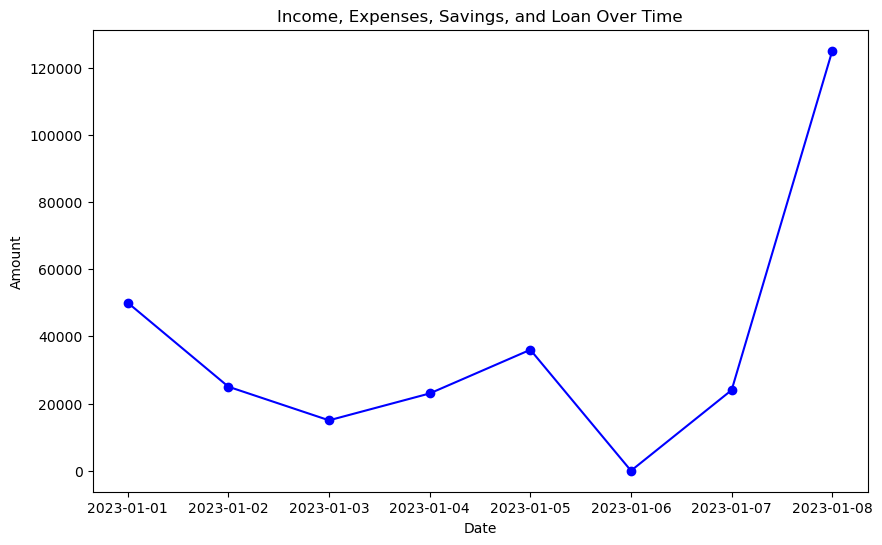

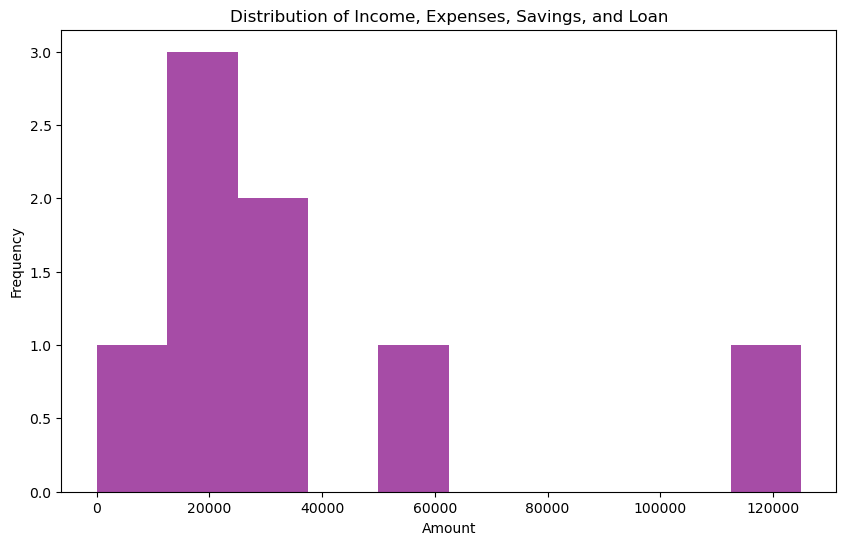

In [3]:
def visualize_data(df, income):
    # Bar Chart
    plt.figure(figsize=(10, 6))
    plt.bar(df['Category'], df['Amount'], color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Amount')
    plt.title('Income, Expenses, Savings, and Loan by Category')
    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(df['Amount'], labels=df['Category'], autopct='%1.1f%%', startangle=140)
    plt.title('Income, Expense, Savings, and Loan Distribution')
    plt.axis('equal')
    plt.show()
    
    # Line Chart (assuming data is collected over a period, we use a placeholder here)
    plt.figure(figsize=(10, 6))
    dates = pd.date_range(start='2023-01-01', periods=len(df), freq='D')  # Placeholder dates
    plt.plot(dates, df['Amount'], marker='o', linestyle='-', color='b')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title('Income, Expenses, Savings, and Loan Over Time')
    plt.show()
    
    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['Amount'], bins=10, color='purple', alpha=0.7)
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.title('Distribution of Income, Expenses, Savings, and Loan')
    plt.show()

def main():
    user_info = collect_user_info()
    df = process_data(user_info)
    visualize_data(df, user_info['income'])

if __name__ == "__main__":
    main()
